In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
X = data.drop('Exited',axis=1)
y = data.Exited

In [6]:
# Creating dummy variables
geography = pd.get_dummies(X.Geography,drop_first=True)
gender = pd.get_dummies(X.Gender,drop_first=True)

In [7]:
# Concatenate the data frames
X = pd.concat([X,geography,gender],axis=1)

In [8]:
X = X.drop(['Geography','Gender'],axis=1)

In [9]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
X.drop('Surname',axis=1,inplace=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from tensorflow import keras

In [18]:
from tensorflow.keras import Sequential


In [19]:
from tensorflow.keras.layers import Dense,Dropout

In [20]:
# Initialising the ANN
classifier = Sequential()

In [31]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform' ,activation='relu',input_dim = 13))

In [ ]:
# For info purpose let's add Dropout
# classifier.add(Dropout(0.3))

In [32]:
# Adding second hidden layer
classifier.add(Dense(units=6,kernel_initializer= 'he_uniform',activation='relu'))

In [ ]:
# For info purpose let's add Dropout
# classifier.add(Dropout(0.3))

In [33]:
# Adding output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
# For info purpose let's add Dropout
# classifier.add(Dropout(0.3))

In [34]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 7s 10ms/step - loss: 0.5341 - accuracy: 0.7964 - val_loss: 0.5025 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5008 - accuracy: 0.7962 - val_loss: 0.4833 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4822 - accuracy: 0.7962 - val_loss: 0.4711 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4698 - accuracy: 0.7962 - val_loss: 0.4621 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4601 - accuracy: 0.7962 - val_loss: 0.4553 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 4s 8ms/step - loss: 0.4525 - accuracy: 0.7962 - val_loss: 0.4502 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4465 - accuracy: 0.7962 - val_loss: 0.4456 - val_accuracy: 0.795

In [38]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [39]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


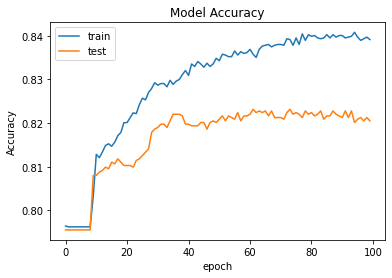

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

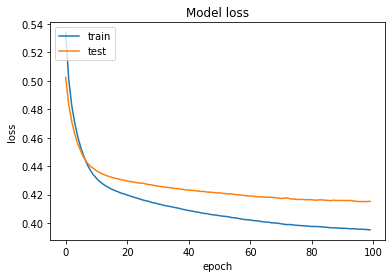

In [42]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1529,   66],
       [ 254,  151]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.84

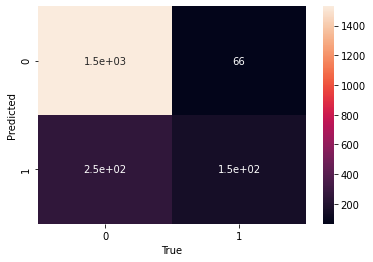

In [51]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [53]:
cls = Sequential()